<a href="https://colab.research.google.com/github/SergioDLezama/Lung-Cancer-Prediction-ML/blob/testing/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To split the data into train and test
from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [46]:
#!pip install scikeras

In [47]:
#!pip install scikit-learn==1.2.2

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from scikeras.wrappers import KerasClassifier

import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

In [49]:
df = pd.read_csv('/content/Lung-Cancer-Prediction-ML/lungcancerdataset.csv')

In [50]:
data = df.copy()

In [51]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,3000.0,55.169000,14.723746,30.0,42.0,55.0,68.0,80.0
SMOKING,3000.0,1.491000,0.500002,1.0,1.0,1.0,2.0,2.0
YELLOW_FINGERS,3000.0,1.514000,0.499887,1.0,1.0,2.0,2.0,2.0
ANXIETY,3000.0,1.494000,0.500047,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,3000.0,1.499000,0.500082,1.0,1.0,1.0,2.0,2.0
CHRONIC_DISEASE,3000.0,1.509667,0.499990,1.0,1.0,2.0,2.0,2.0
FATIGUE,3000.0,1.489667,0.499977,1.0,1.0,1.0,2.0,2.0
ALLERGY,3000.0,1.506667,0.500039,1.0,1.0,2.0,2.0,2.0
WHEEZING,3000.0,1.497333,0.500076,1.0,1.0,1.0,2.0,2.0
ALCOHOL_CONSUMING,3000.0,1.491333,0.500008,1.0,1.0,1.0,2.0,2.0


In [54]:
df.duplicated().sum()

2

In [55]:
print('Before dropping',df.shape[0])
df = df.drop_duplicates()
print('Before dropping',df.shape[0])

Before dropping 3000
Before dropping 2998


In [56]:
cols_to_mod = df.columns[df.dtypes == 'int64']
cols_to_mod = cols_to_mod.drop('AGE')

for col in cols_to_mod:
    df[col] = df[col].map({1:0,2:1})
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,0,0,0,1,1,0,1,1,1,1,1,1,0,NO
1,F,55,0,1,1,0,0,1,1,1,0,0,0,1,1,NO
2,F,78,1,1,0,0,0,1,0,1,0,0,1,0,0,YES
3,M,60,1,0,0,0,1,0,1,0,0,1,0,1,1,YES
4,F,80,0,0,1,0,0,1,0,1,0,0,0,0,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,F,71,1,0,0,1,1,0,0,0,0,1,0,0,1,NO
2996,F,75,0,1,0,0,0,1,1,1,1,0,0,1,0,NO
2997,F,62,1,1,1,0,1,1,1,1,0,0,1,1,1,YES
2998,M,30,0,0,1,1,1,1,1,1,1,0,1,0,1,YES


In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,2998.0,55.171448,14.728302,30.0,42.0,55.0,68.0,80.0
SMOKING,2998.0,0.491328,0.500008,0.0,0.0,0.0,1.0,1.0
YELLOW_FINGERS,2998.0,0.514009,0.499887,0.0,0.0,1.0,1.0,1.0
ANXIETY,2998.0,0.493996,0.500047,0.0,0.0,0.0,1.0,1.0
PEER_PRESSURE,2998.0,0.498666,0.500082,0.0,0.0,0.0,1.0,1.0
CHRONIC_DISEASE,2998.0,0.509673,0.499990,0.0,0.0,1.0,1.0,1.0
FATIGUE,2998.0,0.489660,0.499976,0.0,0.0,0.0,1.0,1.0
ALLERGY,2998.0,0.507005,0.500034,0.0,0.0,1.0,1.0,1.0
WHEEZING,2998.0,0.497332,0.500076,0.0,0.0,0.0,1.0,1.0
ALCOHOL_CONSUMING,2998.0,0.491328,0.500008,0.0,0.0,0.0,1.0,1.0


In [58]:
num_cols = df.select_dtypes(include='int64').columns.tolist()
for i in df[num_cols]:
  print('*'*25)
  print(df[i].value_counts(normalize=True))

*************************
AGE
54    0.024350
75    0.023682
67    0.023682
47    0.023349
69    0.023349
78    0.023015
55    0.023015
79    0.022682
32    0.022015
39    0.021681
37    0.021681
53    0.021681
77    0.021348
46    0.021348
63    0.021014
33    0.020680
50    0.020680
70    0.020347
68    0.020347
35    0.020013
48    0.020013
36    0.020013
71    0.019680
76    0.019680
31    0.019680
56    0.019346
62    0.019346
57    0.019346
52    0.019013
80    0.019013
61    0.019013
60    0.019013
34    0.019013
42    0.018679
41    0.018679
49    0.018679
64    0.018679
59    0.018346
51    0.018346
43    0.018346
44    0.018012
38    0.017678
40    0.017011
58    0.017011
74    0.016678
65    0.016344
66    0.016011
45    0.015677
72    0.015344
73    0.014343
30    0.014009
Name: proportion, dtype: float64
*************************
SMOKING
0    0.508672
1    0.491328
Name: proportion, dtype: float64
*************************
YELLOW_FINGERS
1    0.514009
0    0.485991
Name: pr

In [59]:
# Code to plot a stacked barplot
def stack_bar(data,predictor,target,figsize=(8,4)):
  (pd.crosstab(df[predictor],df[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True,color=('grey','r'))
  plt.legend(loc="lower right")

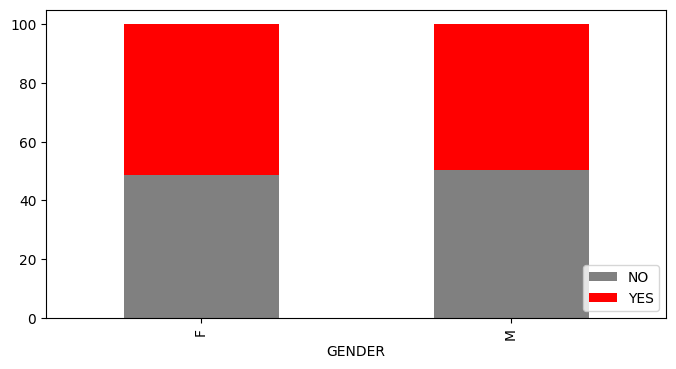

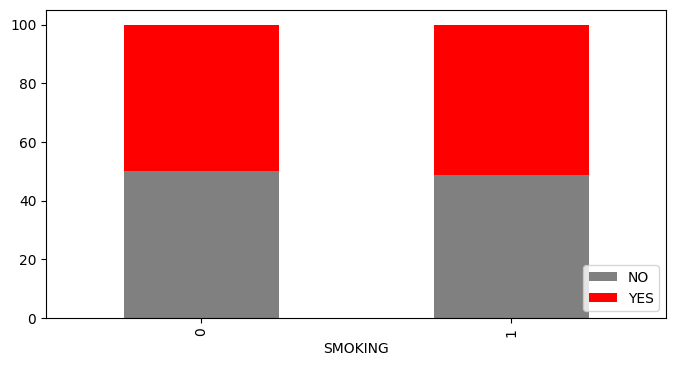

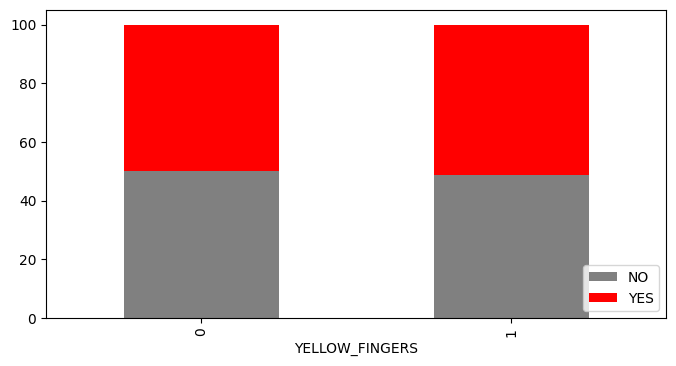

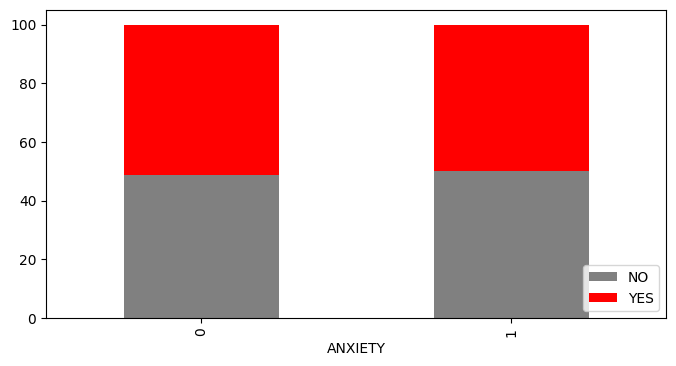

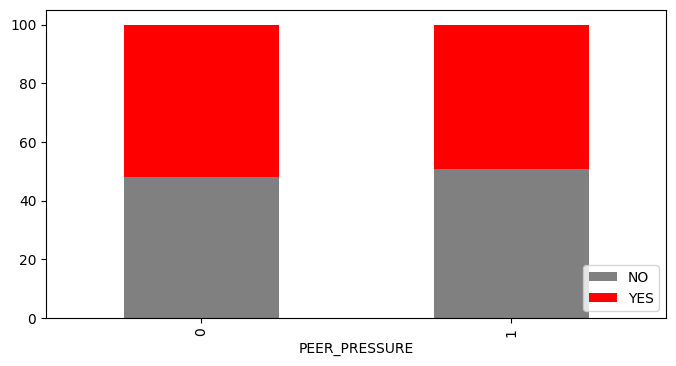

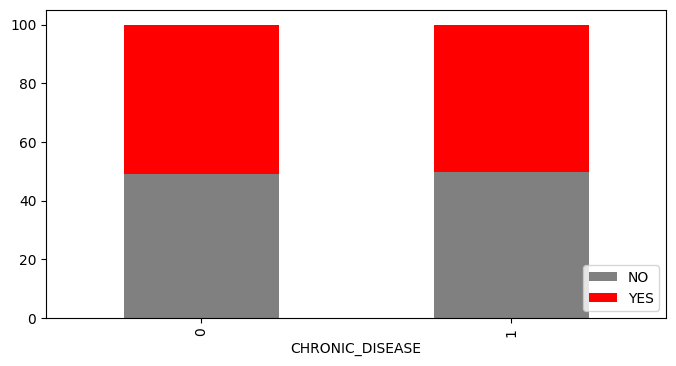

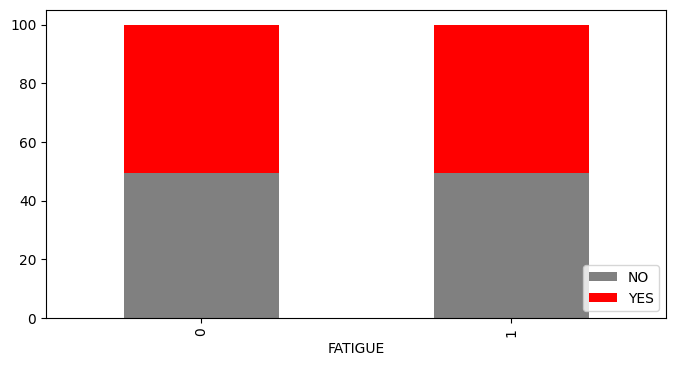

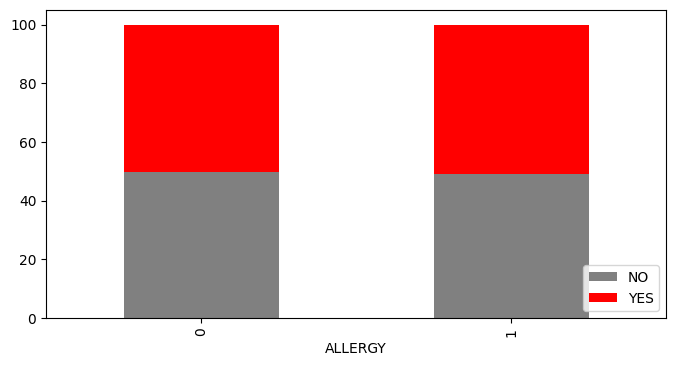

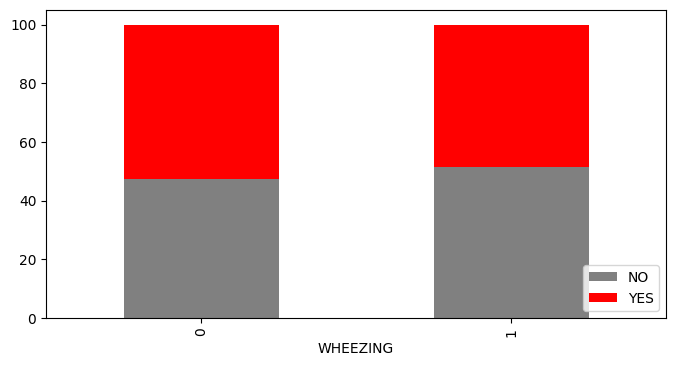

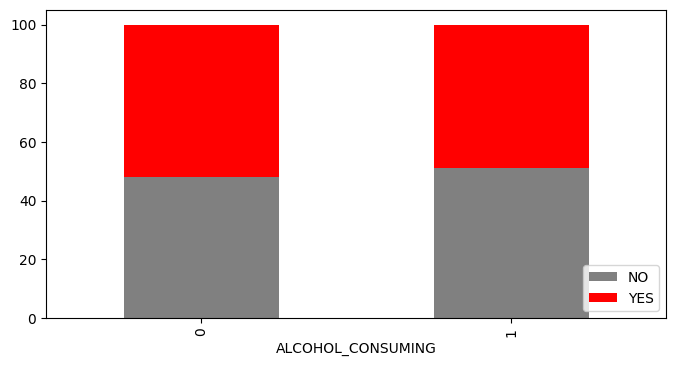

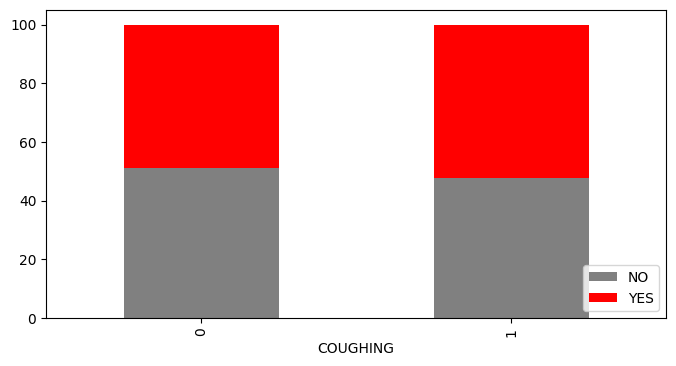

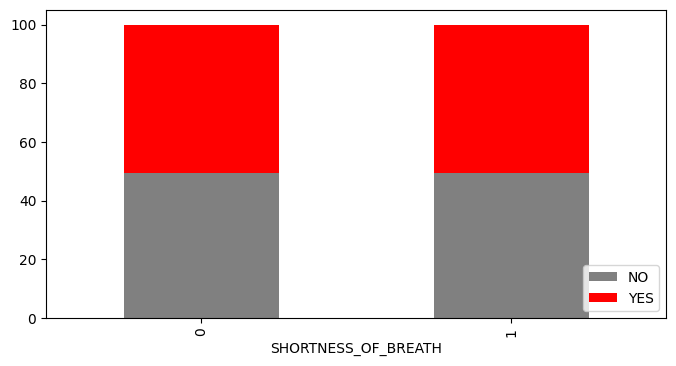

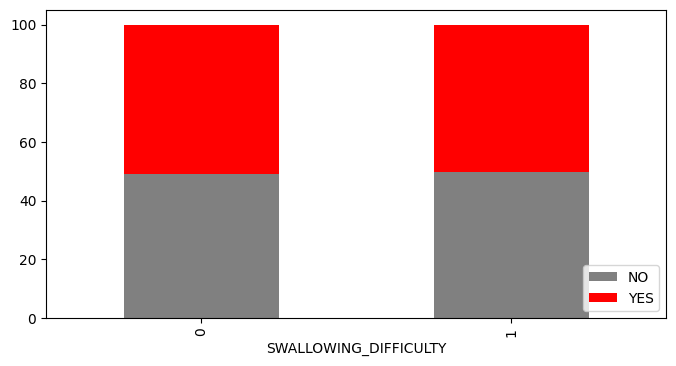

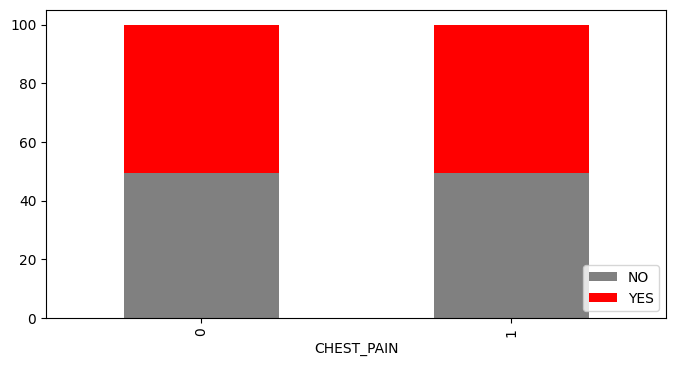

In [60]:
cols_to_analyze = df.columns
cols_to_analyze = cols_to_analyze.drop(['LUNG_CANCER','AGE'])
for i in cols_to_analyze:
  stack_bar(df,i,'LUNG_CANCER')

<Axes: >

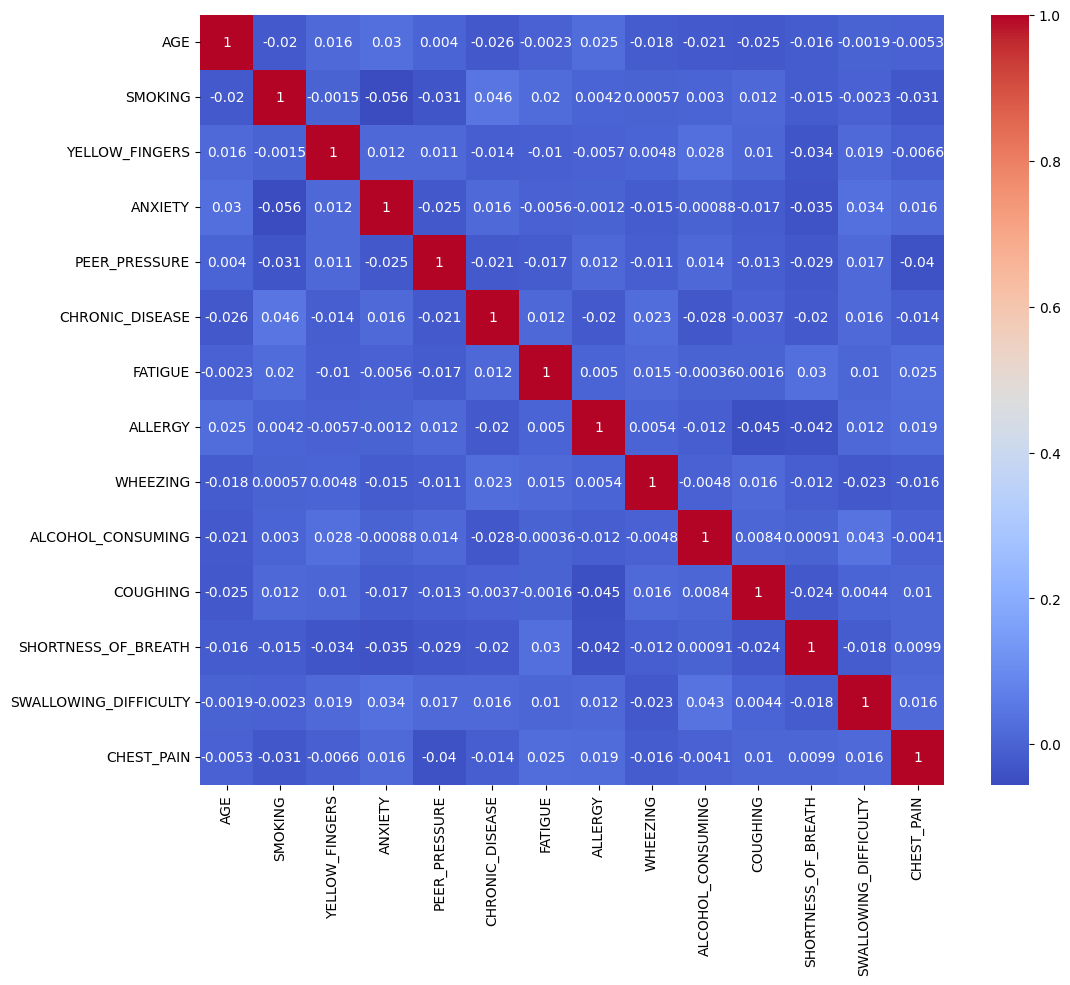

In [61]:
num_cols = df.select_dtypes(include='int64').columns.tolist()

plt.figure(figsize=(12,10))
sns.heatmap(df[num_cols].corr(),annot=True,cmap='coolwarm')

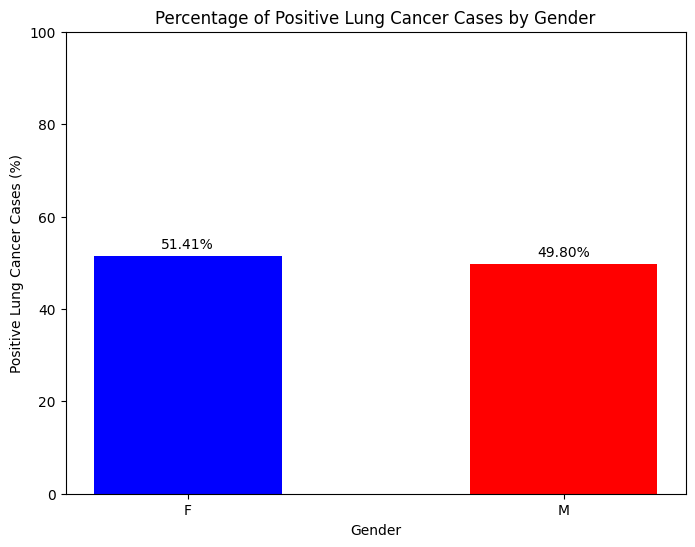

In [62]:
positive = df[df['LUNG_CANCER'] == 'YES']['GENDER'].value_counts()
total = df['GENDER'].value_counts()
positive_percent = (positive / total) * 100

# Plot bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(positive_percent.index, positive_percent.values, color=['blue', 'r'], width=0.5)

# Add labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')

plt.title('Percentage of Positive Lung Cancer Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Positive Lung Cancer Cases (%)')
plt.ylim(0, 100)  # Set y-axis limits to 0-100%
plt.show()

In [63]:
df['GENDER'] = df['GENDER'].map({'M':0,'F':1})

In [64]:
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES':1,'NO':0})

In [65]:
Y = df.LUNG_CANCER
X = df.drop('LUNG_CANCER',axis=1)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [67]:
x_size = (X_train.shape[0]) / X.shape[0]
print(x_size)
y_size = (y_train.shape[0]) / Y.shape[0]
print(y_size)

0.799866577718479
0.799866577718479


In [68]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns)

X_test = sc.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X.columns)



In [69]:
X_train

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
0,1.009217,0.592607,-0.970412,-1.020221,-0.982636,-1.011745,0.987567,1.043480,0.998333,1.009217,1.000834,0.978545,1.021925,1.017671,1.010902
1,1.009217,-0.226730,1.030490,0.980180,-0.982636,-1.011745,0.987567,1.043480,0.998333,1.009217,1.000834,0.978545,-0.978545,1.017671,1.010902
2,-0.990867,1.207110,1.030490,0.980180,1.017671,0.988391,0.987567,-0.958332,0.998333,1.009217,-0.999166,-1.021925,-0.978545,-0.982636,-0.989216
3,1.009217,-1.660571,-0.970412,0.980180,1.017671,0.988391,-1.012590,1.043480,-1.001669,1.009217,-0.999166,-1.021925,1.021925,1.017671,1.010902
4,-0.990867,1.002276,-0.970412,0.980180,-0.982636,0.988391,-1.012590,1.043480,-1.001669,1.009217,1.000834,0.978545,1.021925,-0.982636,1.010902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2393,-0.990867,-1.592292,1.030490,0.980180,-0.982636,-1.011745,0.987567,-0.958332,0.998333,-0.990867,-0.999166,0.978545,1.021925,-0.982636,-0.989216
2394,-0.990867,-0.772955,1.030490,-1.020221,-0.982636,0.988391,0.987567,-0.958332,0.998333,-0.990867,-0.999166,-1.021925,1.021925,1.017671,-0.989216
2395,1.009217,0.797442,1.030490,-1.020221,1.017671,-1.011745,-1.012590,1.043480,-1.001669,1.009217,-0.999166,-1.021925,1.021925,1.017671,-0.989216
2396,-0.990867,1.480223,-0.970412,0.980180,-0.982636,0.988391,-1.012590,-0.958332,-1.001669,-0.990867,1.000834,-1.021925,1.021925,1.017671,1.010902


In [70]:
# Function to calculate the Classification report and confusion Matrix
def conf_matrix(real, predicted):
    print(classification_report(real, predicted))

    cm = confusion_matrix(real, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.ylabel('Real')
    plt.xlabel('Predicted')
    plt.show()

In [71]:
dt = DecisionTreeClassifier()

In [72]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1194
           1       1.00      1.00      1.00      1204

    accuracy                           1.00      2398
   macro avg       1.00      1.00      1.00      2398
weighted avg       1.00      1.00      1.00      2398



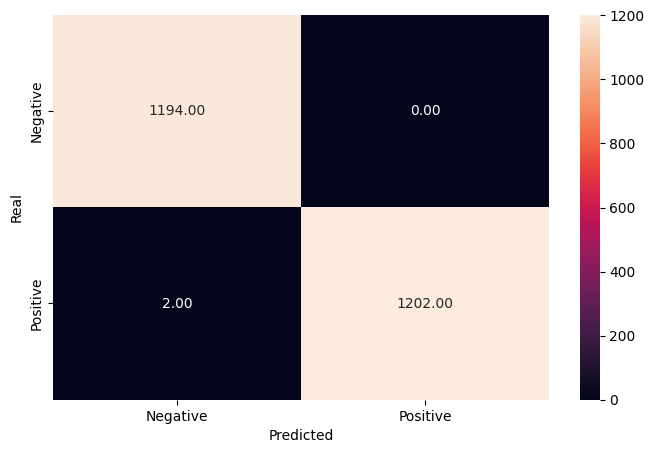

In [73]:
dt_pred1 = dt.predict(X_train)
conf_matrix(y_train, dt_pred1)

              precision    recall  f1-score   support

           0       0.48      0.48      0.48       287
           1       0.52      0.52      0.52       313

    accuracy                           0.50       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.50      0.50      0.50       600



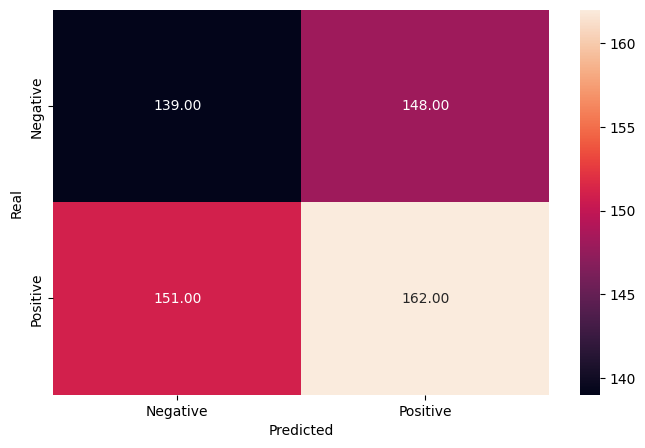

In [74]:
# Code to check the model efficiency on the test data
dt_evaluation_1 = dt.predict(X_test)
conf_matrix(y_test ,dt_evaluation_1)

In [33]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=7,class_weight = {0: 0.5, 1: 0.5})

# Different parameters for the model
parameters = {
    "max_depth": [8,9,10,11],
    "max_leaf_nodes": np.arange(1,100,10),
    "min_samples_split": np.arange(1,20,1),
    'criterion': ['gini', 'entropy']
}
# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the model to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, max_depth=10,
                       max_leaf_nodes=41, min_samples_split=14, random_state=7)

              precision    recall  f1-score   support

           0       0.60      0.62      0.61      1194
           1       0.61      0.59      0.60      1204

    accuracy                           0.61      2398
   macro avg       0.61      0.61      0.61      2398
weighted avg       0.61      0.61      0.61      2398



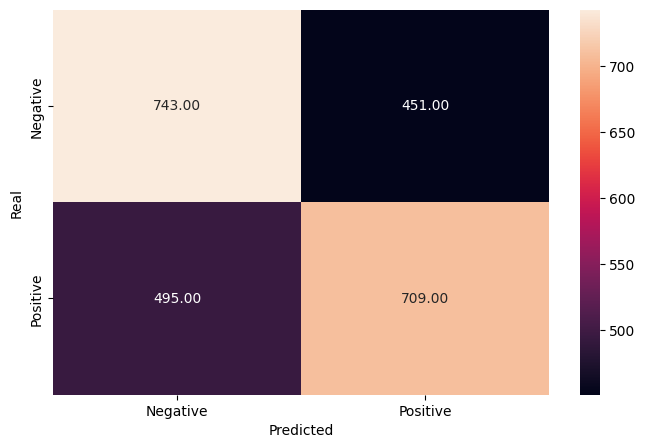

In [34]:
dt_predict_2 = estimator.predict(X_train)
conf_matrix(y_train,dt_predict_2)

              precision    recall  f1-score   support

           0       0.50      0.51      0.51       287
           1       0.54      0.53      0.54       313

    accuracy                           0.52       600
   macro avg       0.52      0.52      0.52       600
weighted avg       0.52      0.52      0.52       600



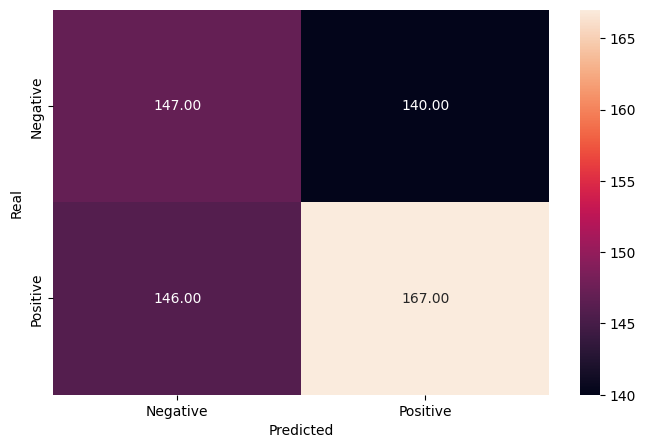

In [35]:
dt_evaluation_2 = estimator.predict(X_test)
conf_matrix(y_test,dt_evaluation_2)

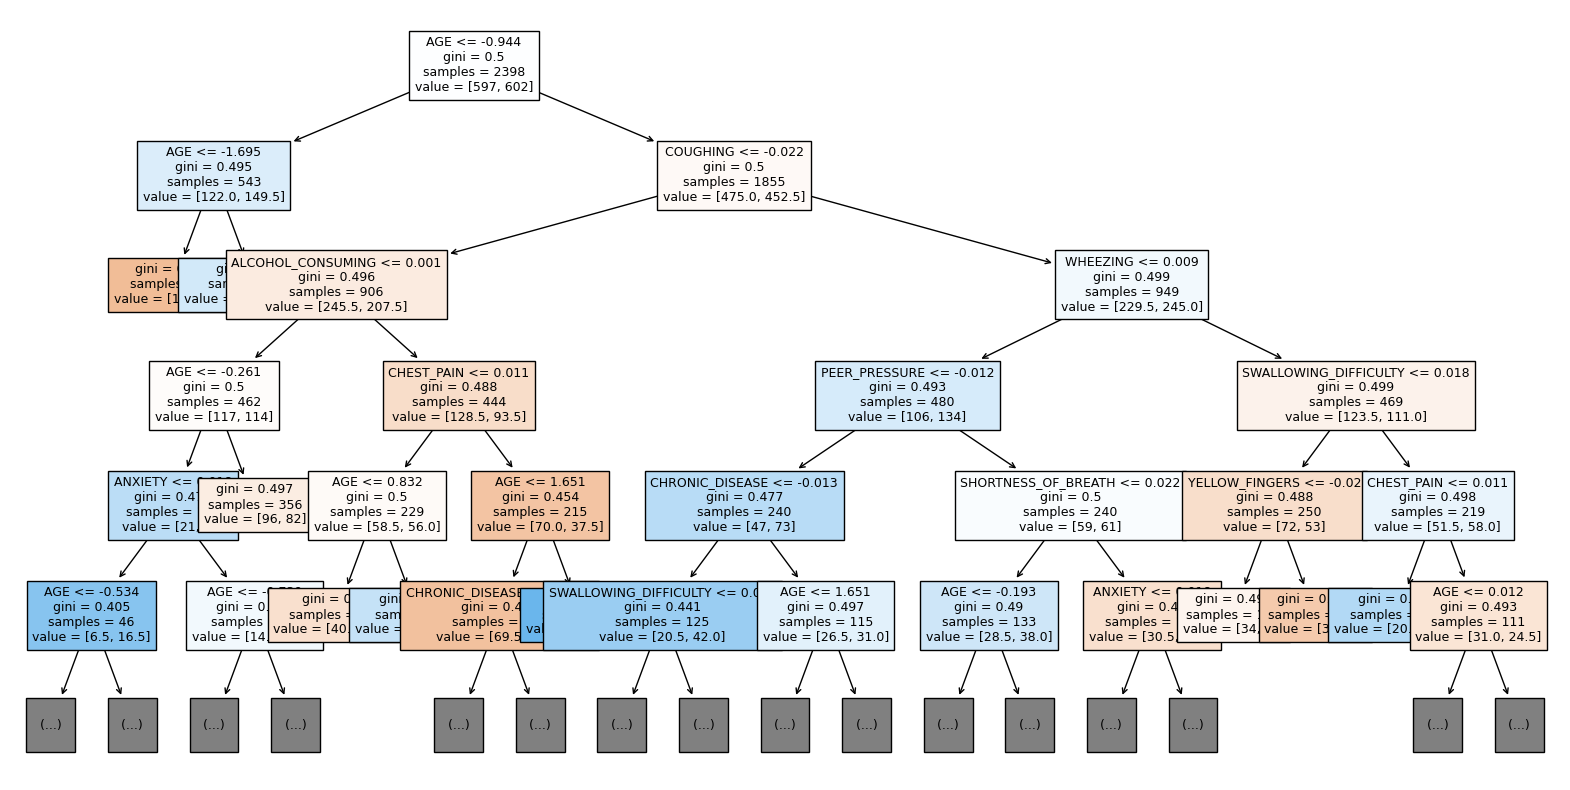

In [36]:
# Visualizing the decision tree
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    max_depth=5,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for i in out:
    arrow = i.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

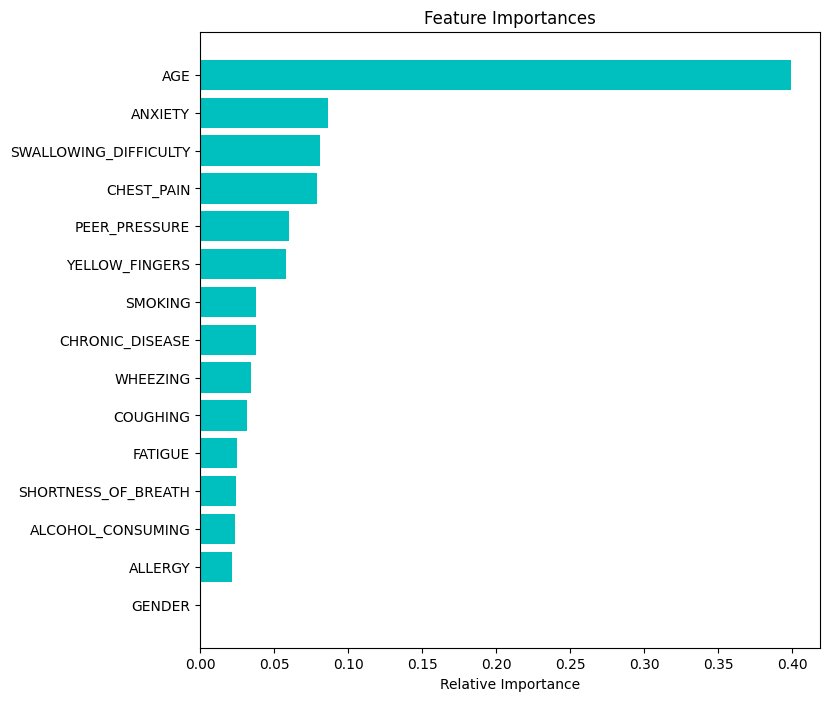

In [37]:
# Importance of features in the tree building
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center",color='c')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Random Forest

In [38]:
rf = RandomForestClassifier(random_state=7)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1194
           1       1.00      1.00      1.00      1204

    accuracy                           1.00      2398
   macro avg       1.00      1.00      1.00      2398
weighted avg       1.00      1.00      1.00      2398



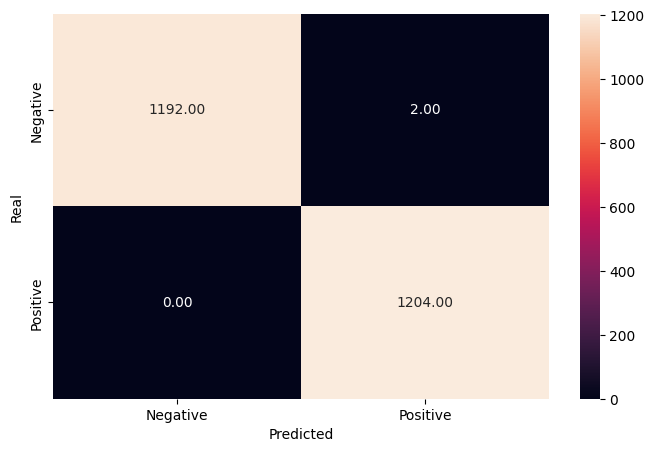

In [39]:
rf_pred1 = rf.predict(X_train)
conf_matrix(y_train, rf_pred1)

              precision    recall  f1-score   support

           0       0.50      0.54      0.52       287
           1       0.55      0.51      0.53       313

    accuracy                           0.53       600
   macro avg       0.53      0.53      0.53       600
weighted avg       0.53      0.53      0.53       600



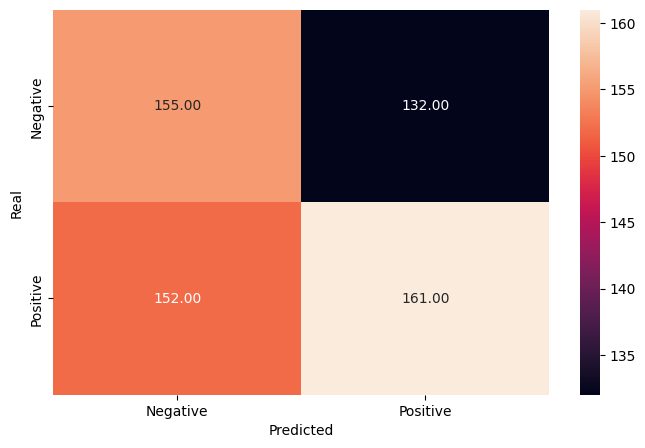

In [40]:
rf_evaluation_1 = rf.predict(X_test)
conf_matrix(y_test, rf_evaluation_1)

In [41]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 1,class_weight = {0: 0.5, 1: 0.5})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 6],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "class_weight": ["balanced",{0: 0.5, 1: 0.5}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, cv=5,scoring='recall',n_jobs=-1)

grid_obj = grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.5, 1: 0.5}, criterion='entropy',
                       max_depth=6, max_features=0.8, min_samples_leaf=25,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.69      0.68      0.68      1194
           1       0.68      0.70      0.69      1204

    accuracy                           0.69      2398
   macro avg       0.69      0.69      0.69      2398
weighted avg       0.69      0.69      0.69      2398



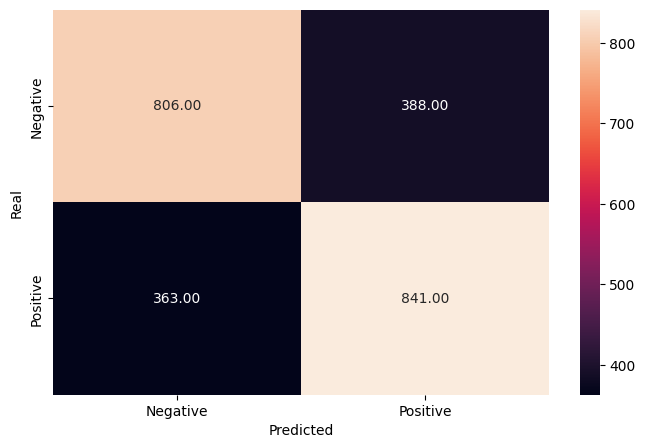

In [42]:
rf_predict_2 = rf_estimator_tuned.predict(X_train)
conf_matrix(y_train, rf_predict_2)

              precision    recall  f1-score   support

           0       0.52      0.52      0.52       287
           1       0.56      0.57      0.56       313

    accuracy                           0.54       600
   macro avg       0.54      0.54      0.54       600
weighted avg       0.54      0.54      0.54       600



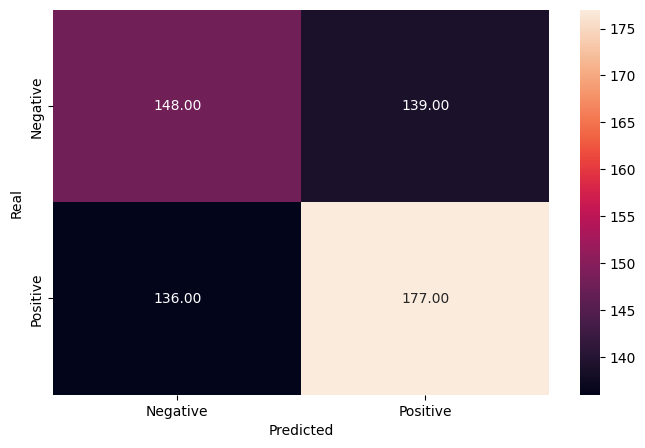

In [43]:
rf_evaluation_2 = rf_estimator_tuned.predict(X_test)
conf_matrix(y_test, rf_evaluation_2)

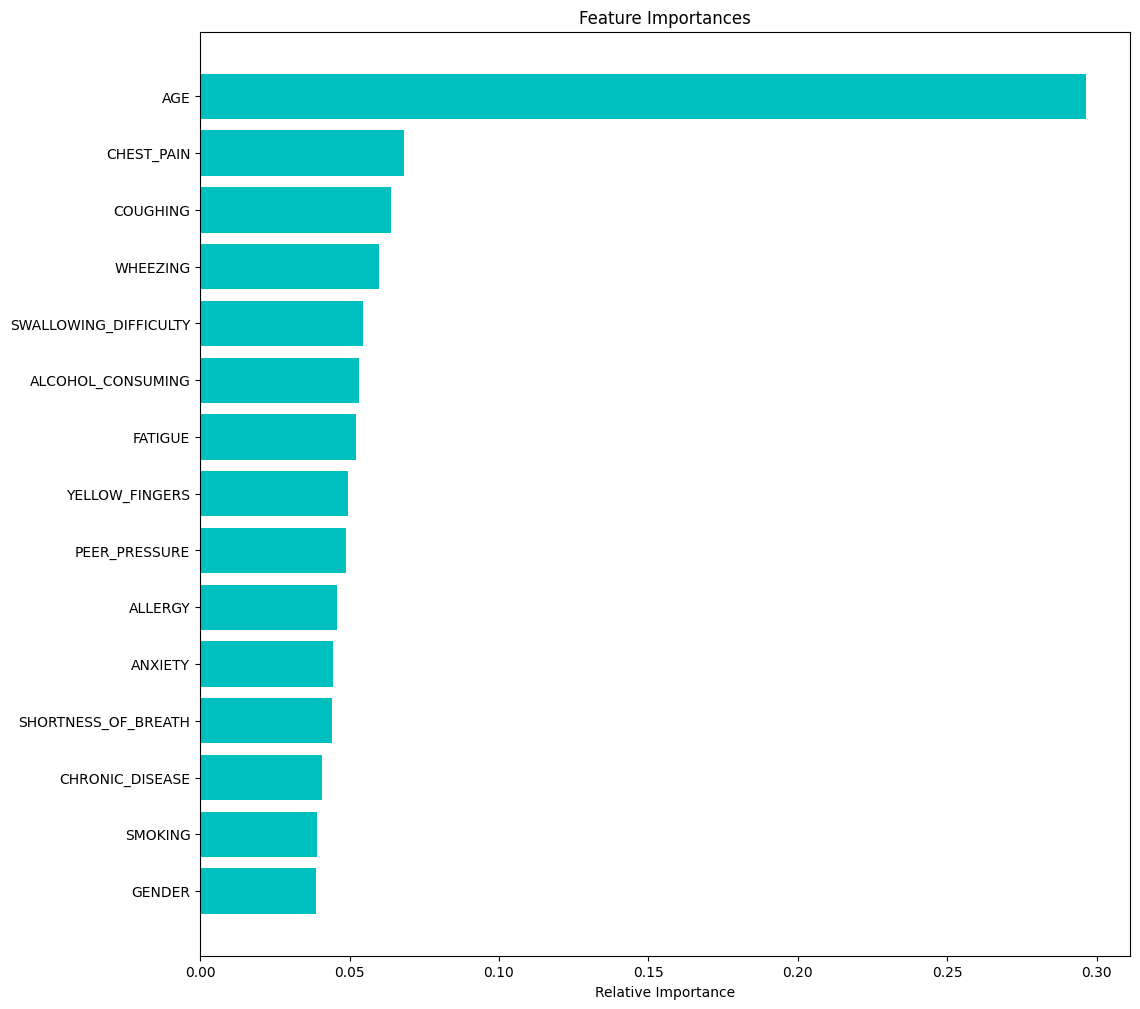

In [44]:
# Code to see the most important features for the Random Forest
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize = (12, 12))
plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], align = 'center',color = 'c')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

DeepLearning Model

In [85]:
# Fixing the seed for random number generators
np.random.seed(7)

import random
random.seed(7)

tf.random.set_seed(7)

In [76]:
X.shape

(2998, 15)

In [86]:
# Initializing the ANN
model = Sequential()
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 64.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(activation = 'relu', input_dim = 15, units=64))
#Add 1st hidden layer
model.add(Dense(32, activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim.
# we have an output of 1 node, which is the the desired dimensions of our output
# We use the sigmoid because we want probability outcomes
model.add(Dense(1, activation = 'sigmoid'))

In [87]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['recall'])

In [88]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

In [89]:
history=model.fit(X_train, y_train,
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.7072 - recall: 0.5556 - val_loss: 0.7086 - val_recall: 0.4959
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7042 - recall: 0.5222 - val_loss: 0.7069 - val_recall: 0.4918
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7015 - recall: 0.5167 - val_loss: 0.7056 - val_recall: 0.4836
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6993 - recall: 0.5188 - val_loss: 0.7046 - val_recall: 0.4877
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6973 - recall: 0.5278 - val_loss: 0.7038 - val_recall: 0.4836
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6955 - recall: 0.5332 - val_loss: 0.7031 - val_recall: 0.4959
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6939 - recall: 0.5306 - val_loss: 0.7026 - val_recall: 0.4877
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6925 - recall: 0.5324 - val_loss: 0.7021 - val_recall: 0.4836
Epoch 9/50
60/60 ━━━━━━

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7131 - recall: 0.5087  


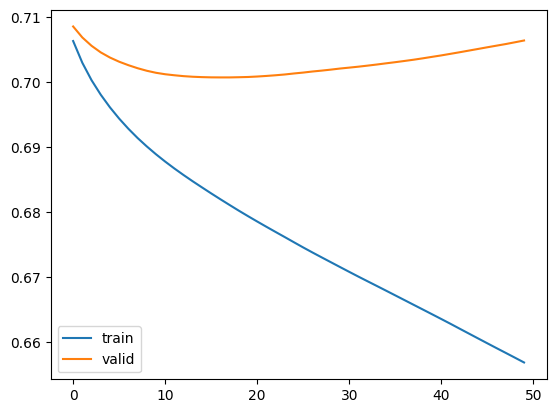

In [90]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_test, y_test)

In [91]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)


    if title:
        plt.title(title)

In [93]:
y_pred=model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [

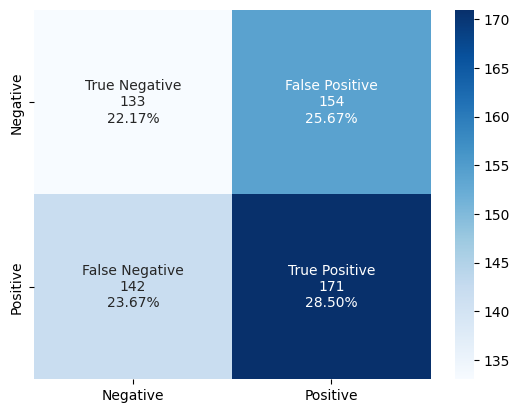

In [127]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Negative','Positive']
make_confusion_matrix(cm,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [95]:
#Accuracy as per the classification report
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.48      0.46      0.47       287
           1       0.53      0.55      0.54       313

    accuracy                           0.51       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.51      0.51      0.51       600



In [96]:
backend.clear_session()
np.random.seed(7)
import random
random.seed(7)
tf.random.set_seed(7)

In [97]:
model1 = Sequential()
      #Adding the hidden and output layers
model1.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model1.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function
optimizer = tf.keras.optimizers.Adam(0.001)
model1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['recall'])

In [98]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           4,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,361 (185.00 KB)

 Trainable params: 47,361 (185.00 KB)

 Non-trainable params: 0 (0.00 B)

In [99]:
history1 = model1.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.7291 - recall: 0.5198 - val_loss: 0.7039 - val_recall: 0.4508
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6502 - recall: 0.6861 - val_loss: 0.7125 - val_recall: 0.6270
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.6102 - recall: 0.7621 - val_loss: 0.7313 - val_recall: 0.6230
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5749 - recall: 0.7868 - val_loss: 0.7491 - val_recall: 0.5656
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5403 - recall: 0.7992 - val_loss: 0.7848 - val_recall: 0.5328
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5070 - recall: 0.8081 - val_loss: 0.8048 - val_recall: 0.5246
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4760 - recall: 0.8113 - val_loss: 0.8244 - val_recall: 0.5533
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4475 - recall: 0.8227 - val_loss: 0.8433 - val_recall: 0.4877
Epoch 9/50
30/30 ━━━━━

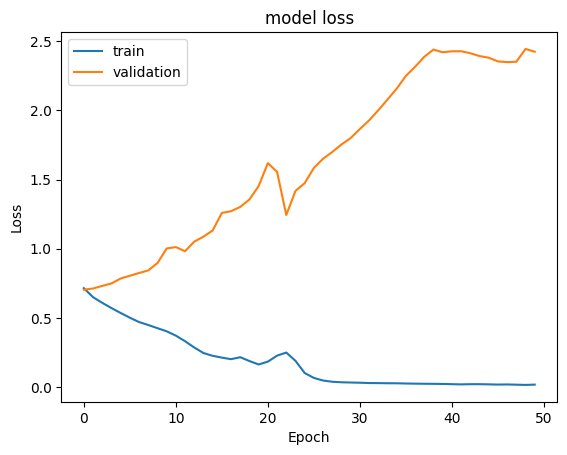

In [100]:
#Plotting Train Loss vs Validation Loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Best Threshold=0.868677, G-Mean=0.516


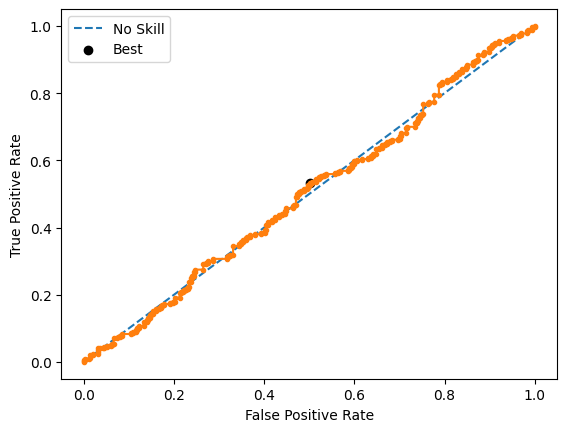

In [101]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat1 = model1.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [102]:
#Predicting the results using best as a threshold
y_pred_e1=model1.predict(X_test)
y_pred_e1 = (y_pred_e1 > thresholds1[ix])
y_pred_e1

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

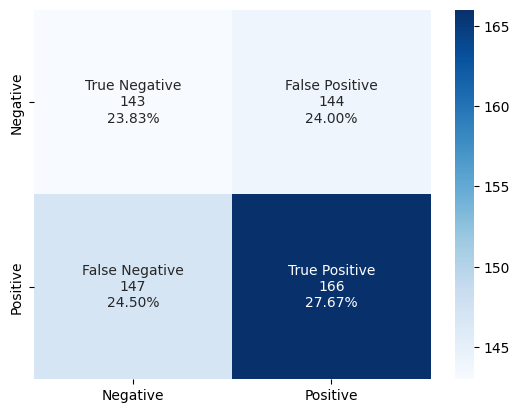

In [128]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred_e1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Negative','Positive']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [104]:
#Accuracy as per the classification report
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_e1)
print(cr)

              precision    recall  f1-score   support

           0       0.49      0.50      0.50       287
           1       0.54      0.53      0.53       313

    accuracy                           0.52       600
   macro avg       0.51      0.51      0.51       600
weighted avg       0.52      0.52      0.52       600



In [106]:
backend.clear_session()
np.random.seed(7)
import random
random.seed(7)
tf.random.set_seed(7)

In [107]:
model2 = Sequential()
model2.add(Dense(128,activation='relu',input_dim = X_train.shape[1]))
model2.add(BatchNormalization())
model2.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model2.add(BatchNormalization())
model2.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(1, activation = 'sigmoid'))

In [108]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,185 (51.50 KB)

 Trainable params: 12,801 (50.00 KB)

 Non-trainable params: 384 (1.50 KB)

In [109]:
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [110]:
history_2 = model2.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.5063 - loss: 0.7756 - val_accuracy: 0.5208 - val_loss: 0.6970
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6555 - loss: 0.6284 - val_accuracy: 0.5437 - val_loss: 0.6938
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7119 - loss: 0.5872 - val_accuracy: 0.5208 - val_loss: 0.6985
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7433 - loss: 0.5566 - val_accuracy: 0.5167 - val_loss: 0.7051
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7695 - loss: 0.5288 - val_accuracy: 0.5125 - val_loss: 0.7128
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7977 - loss: 0.5022 - val_accuracy: 0.5208 - val_loss: 0.7216
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8170 - loss: 0.4743 - val_accuracy: 0.5146 - val_loss: 0.7332
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8418 - loss: 0.4462 - val_accuracy: 0.5292 - val_loss

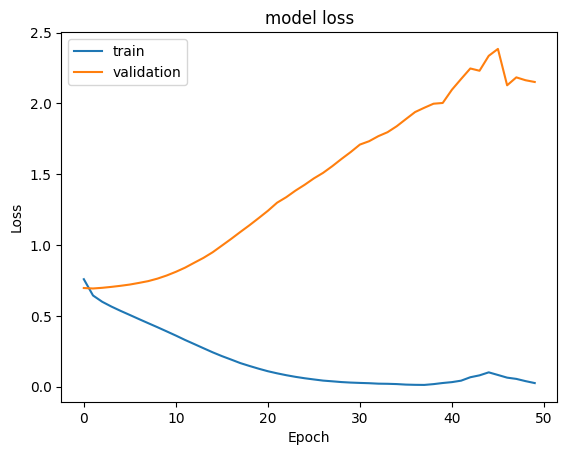

In [111]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Best Threshold=0.254791, G-Mean=0.534


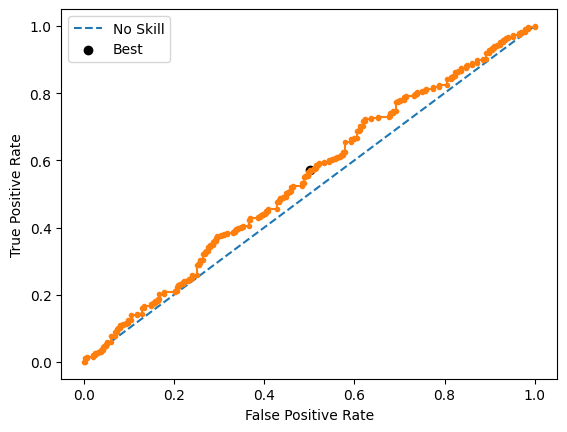

In [112]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat2 = model2.predict(X_test)
# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]
# calculate roc curves
fpr, tpr, thresholds2 = roc_curve(y_test, yhat2)
# calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2[ix], gmeans2[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [113]:
y_pred_e2=model2.predict(X_test)
y_pred_e2 = (y_pred_e2 > thresholds2[ix])
y_pred_e2

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [

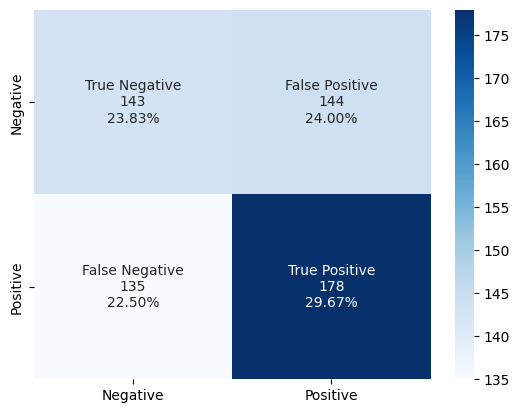

In [126]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test, y_pred_e2)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Negative','Positive']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [115]:
#Accuracy as per the classification report
from sklearn import metrics
cr2=metrics.classification_report(y_test,y_pred_e2)
print(cr2)

              precision    recall  f1-score   support

           0       0.51      0.50      0.51       287
           1       0.55      0.57      0.56       313

    accuracy                           0.54       600
   macro avg       0.53      0.53      0.53       600
weighted avg       0.53      0.54      0.53       600



In [116]:
backend.clear_session()
np.random.seed(7)
import random
random.seed(7)
tf.random.set_seed(7)

In [117]:
model3 = Sequential()
model3.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
model3.add(Dropout(0.2))
model3.add(Dense(128,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(32,activation='relu'))
model3.add(Dense(1, activation = 'sigmoid'))

In [118]:
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           4,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,361 (185.00 KB)

 Trainable params: 47,361 (185.00 KB)

 Non-trainable params: 0 (0.00 B)

In [119]:
optimizer = tf.keras.optimizers.Adam(0.001)
model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [120]:
history_3 = model3.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.5239 - loss: 0.6951 - val_accuracy: 0.5083 - val_loss: 0.6926
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5559 - loss: 0.6838 - val_accuracy: 0.4667 - val_loss: 0.6970
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5905 - loss: 0.6759 - val_accuracy: 0.4812 - val_loss: 0.6967
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6048 - loss: 0.6683 - val_accuracy: 0.4938 - val_loss: 0.7041
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6105 - loss: 0.6625 - val_accuracy: 0.5000 - val_loss: 0.7149
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5963 - loss: 0.6610 - val_accuracy: 0.5021 - val_loss: 0.7103
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6113 - loss: 0.6520 - val_accuracy: 0.4917 - val_loss: 0.7165
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6272 - loss: 0.6437 - val_accuracy: 0.4938 - val_los

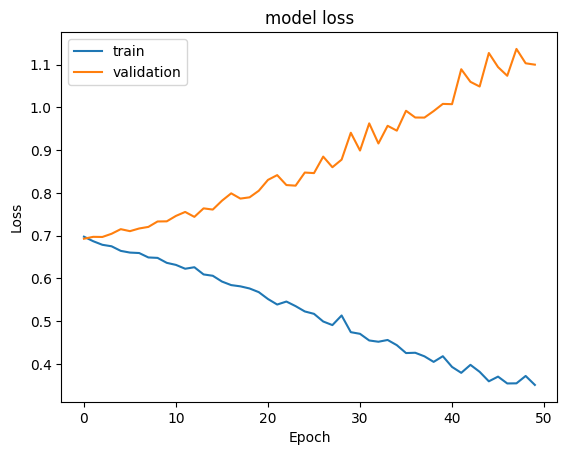

In [121]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Best Threshold=0.313245, G-Mean=0.509


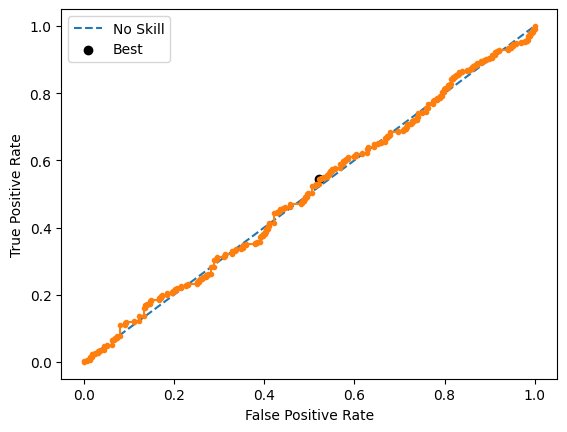

In [122]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat3 = model3.predict(X_test)
# keep probabilities for the positive outcome only
yhat3 = yhat3[:, 0]
# calculate roc curves
fpr, tpr, thresholds3 = roc_curve(y_test, yhat3)
# calculate the g-mean for each threshold
gmeans3 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans3)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds3[ix], gmeans3[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [123]:
y_pred_e3=model3.predict(X_test)
y_pred_e3 = (y_pred_e3 > thresholds3[ix])
y_pred_e3

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

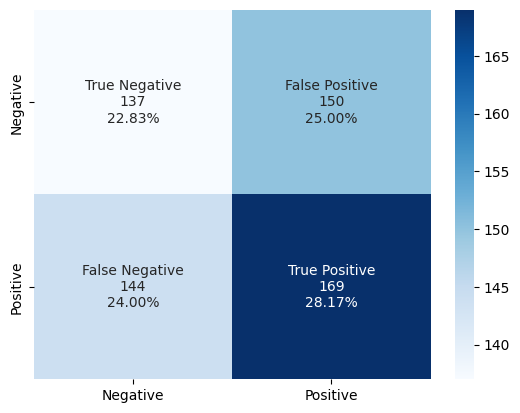

In [125]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(y_test, y_pred_e3)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Negative','Positive']
make_confusion_matrix(cm3,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [129]:
#Accuracy as per the classification report
from sklearn import metrics
cr3=metrics.classification_report(y_test,y_pred_e3)
print(cr3)

              precision    recall  f1-score   support

           0       0.49      0.48      0.48       287
           1       0.53      0.54      0.53       313

    accuracy                           0.51       600
   macro avg       0.51      0.51      0.51       600
weighted avg       0.51      0.51      0.51       600



In [131]:
backend.clear_session()
np.random.seed(7)
import random
random.seed(7)
tf.random.set_seed(7)

In [132]:
def create_model_v4():
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam()
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [133]:
keras_estimator = KerasClassifier(build_fn=create_model_v4, optimizer="Adam", verbose=1)
# define the grid search parameters
learn_rate = [0.01, 0.1, 0.001]
batch_size = [32, 64, 128]
param_random = dict(optimizer__learning_rate=learn_rate, batch_size=batch_size)

kfold_splits = 3
random= RandomizedSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_distributions=param_random,n_jobs=-1)

In [134]:
random_result = random.fit(X_train, y_train,validation_split=0.2,verbose=1)

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5048 - loss: 0.7024 - val_accuracy: 0.5208 - val_loss: 0.6918
Best: 0.513336 using {'optimizer__learning_rate': 0.001, 'batch_size': 32}


In [135]:
estimator_v4=create_model_v4()

estimator_v4.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 256)                 │           4,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,361 (185.00 KB)

 Trainable params: 47,361 (185.00 KB)

 Non-trainable params: 0 (0.00 B)

In [136]:
optimizer = tf.keras.optimizers.Adam()
estimator_v4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_4=estimator_v4.fit(X_train, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.5262 - loss: 0.6938 - val_accuracy: 0.5604 - val_loss: 0.6904
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5393 - loss: 0.6873 - val_accuracy: 0.4938 - val_loss: 0.6953
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5458 - loss: 0.6857 - val_accuracy: 0.4917 - val_loss: 0.6996
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5629 - loss: 0.6869 - val_accuracy: 0.5021 - val_loss: 0.6991
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5581 - loss: 0.6781 - val_accuracy: 0.4979 - val_loss: 0.7051
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5966 - loss: 0.6697 - val_accuracy: 0.4896 - val_loss: 0.7072
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5871 - loss: 0.6710 - val_accuracy: 0.5000 - val_loss: 0.7128
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5861 - loss: 0.6707 - val_accuracy: 0.4771 - val_lo

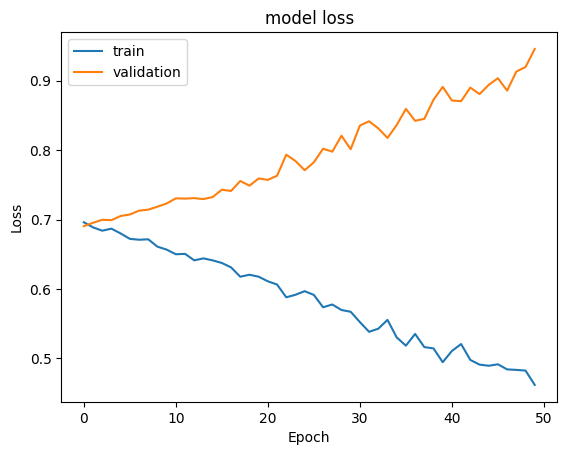

In [137]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Best Threshold=0.400886, G-Mean=0.508


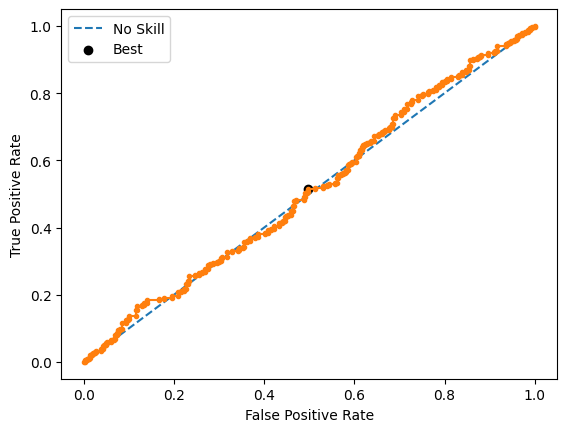

In [138]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat4 = estimator_v4.predict(X_test)
# keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]
# calculate roc curves
fpr, tpr, thresholds4 = roc_curve(y_test, yhat4)
# calculate the g-mean for each threshold
gmeans4 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds4[ix], gmeans4[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [139]:
y_pred_e4=estimator_v4.predict(X_test)
y_pred_e4 = (y_pred_e4 > thresholds4[ix])
y_pred_e4

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

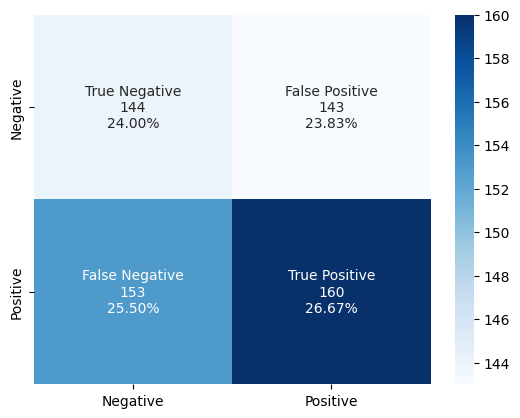

In [141]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(y_test, y_pred_e4)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Negative','Positive']
make_confusion_matrix(cm4,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')